## 감성 분석(Scikit-Learn)
---
로지스틱 회귀를 활용하여 감성사전을 만들고 감성분석하기

### 3. 네이버 영화 리뷰 별점 활용 감성 분석

In [1]:
import pandas as pd

In [2]:
review_star = pd.read_csv("movie_review.csv", encoding='utf8')

#### 데이터 전처리(정규화)

In [3]:
review_star.tail()

,score,review
285,10,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t관람객\r\n\t\t\t\t\...
286,10,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t관람객\r\n\t\t\t\t\...
287,10,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t관람객\r\n\t\t\t\t\...
288,10,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t관람객\r\n\t\t\t\t\...
289,10,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t관람객\r\n\t\t\t\t\...


In [4]:
review_star['review'] = review_star['review'].str.replace(pat='관람객', repl = '')

In [5]:
review_star.tail()

,score,review
285,10,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t...
286,10,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t...
287,10,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t...
288,10,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t...
289,10,\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t...


In [6]:
review_star['review'] = review_star['review'].str.replace(pat=r'[^ A-Za-z0-9가-힣+]', repl = r'', regex = True)

In [7]:
review_star.head()

,score,review
0,10,평점 잘 안주는데 만점 줄려고 왔다
1,10,영화관이 필요한 이유
2,10,중국 애들은 불쌍타 나라 잘못 만나서 이런 영화를 극장에서 못보다니
3,10,감동의눈물 나올정도입니다 평점10점급임 내가 전투기 탄 기분이였음
4,10,탑건11986년의 36년만의 나온 속편 매우 만족 스러웠고 매우 재밌었다 무조건 특...


#### 형태소 분석 및 백터라이즈, TDM 생성

In [8]:
from konlpy.tag import Komoran
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
tag = Komoran()

In [10]:
def kor_noun(text):
    words = []
    for w in tag.nouns(text):
        if len(w) > 1:
            words.append(w)
    return words        

In [23]:
cv = CountVectorizer(tokenizer=kor_noun)
tdm = cv.fit_transform(review_star['review'])

#### 학습 및 테스트 데이터 분리

In [19]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(tdm, review_star['score'], test_size=0.2, random_state=1234)

#### 모델 생성

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logreg = LogisticRegression()

In [37]:
logreg.fit(X_train, y_train)

LogisticRegression()

#### 예측 및 평가

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.9310344827586207

#### 긍정 및 부정 단어 확인

In [41]:
words = cv.get_feature_names()
sent_dict = sorted(zip(logreg.coef_[0], words))

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
sent_dict[:10]

[(-0.1564802077293925, '영화'),
 (-0.06569521505529421, '극장'),
 (-0.04883998564695407, '영화관'),
 (-0.04491359038255094, '속편'),
 (-0.04186715299298216, '감동'),
 (-0.04186354692331346, '최고'),
 (-0.030324623452832673, '액션'),
 (-0.02844678278588819, '톰 크루즈'),
 (-0.027684427057181032, '미션'),
 (-0.027684427057181032, '서브')]

In [51]:
sent_dict[0]

(-0.1564802077293925, '영화')

<AxesSubplot:>

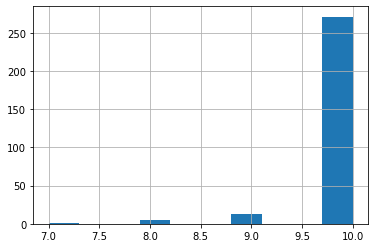

In [44]:
%matplotlib inline
review_star['score'].hist()